<a href="https://colab.research.google.com/github/farhannaushad08/Deep-Learning-Journey/blob/main/Pydicom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook demonstrates my learning progress with **PyDicom**, a Python library used to work with DICOM (Digital Imaging and Communications in Medicine) files.  
DICOM is the standard format for storing and transmitting medical imaging data such as MRI, CT, and X-ray scans.

Through this notebook, I explore how to:
- Read and inspect DICOM metadata
- Display medical images
- Modify and anonymize patient information
- Save and export DICOM files


**Installing and Importing Libraries**

In [1]:
!pip install pydicom matplotlib Pillow
import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

**Reading and Inspecting DICOM Metadata**

In [2]:
# Read the DICOM file
dcm= pydicom.dcmread('CT_small.dcm')

# Get pixel data from the DICOM file
pixel_data = dcm.pixel_array

# Convert pixel data to a PIL Image and convert to 'L' mode for JPEG saving
image = Image.fromarray(pixel_data).convert('L')

# Save the image as JPG
image.save('example.jpg')

In [3]:
print(dcm)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002,0013) Implementation Version Name         SH: 'DCTOOL100'
(0002,0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0012) Instance Creation Date              DA: '20040119'
(0008,0013) Instance Creation Time              TM: '072731'
(0008,0014) Instance Creator UID                UI: 1.3.6.1.4.

In [4]:
# Print key metadata
print("Patient Name:", dcm.PatientName)
print("Patient ID:", dcm.PatientID)
print("Modality:", dcm.Modality)
print("Study Date:", dcm.StudyDate)



Patient Name: CompressedSamples^CT1
Patient ID: 1CT1
Modality: CT
Study Date: 20040119


**Displaying the Image**

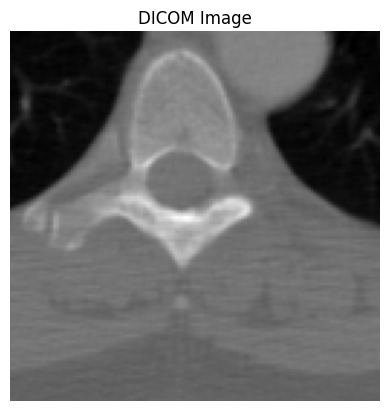

In [5]:
plt.imshow(pixel_data, cmap=plt.cm.gray)
plt.title("DICOM Image")
plt.axis('off')
plt.show()


**Convert group of Dicom Images into JPGs or PNGs**

In [6]:
import os
import pydicom
from PIL import Image

def convert_dicom_to_png(dicom_dir, output_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through all DICOM files in the input directory
    for filename in os.listdir(dicom_dir):
        if filename.endswith('.dcm'):
            # Read the DICOM file with force=True
            try:
                dcm_file = pydicom.dcmread(os.path.join(dicom_dir, filename), force=True)

                # Extract pixel data
                pixel_data = dcm_file.pixel_array

                # Convert pixel data to image
                image = Image.fromarray(pixel_data).convert('L')

                # Save the image as JPG
                output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.jpg')
                image.save(output_path)

                print(f"Converted {filename} to {output_path}")
            except Exception as e:
                print(f"Error converting {filename}: {e}")


# Example usage
dicom_directory = '/content'
output_directory = '/content'
convert_dicom_to_png(dicom_directory, output_directory)

Error converting output.dcm: Unable to decode the pixel data as the dataset's 'file_meta' has no (0002,0010) 'Transfer Syntax UID' element
Error converting anonymized_output.dcm: Unable to decode the pixel data as the dataset's 'file_meta' has no (0002,0010) 'Transfer Syntax UID' element
Converted CT_small.dcm to /content/CT_small.jpg


**Convert Dicom files into NIfTI files**

NIfTI (Neuroimaging Informatics Technology Initiative) is a file format commonly used in neuroimaging to store medical imaging data, particularly MRI (Magnetic Resonance Imaging) and fMRI (functional MRI) data.

In [7]:
pip install dicom2nifti

In [8]:
import os
import dicom2nifti

def convert_dicom_to_nifti(dicom_dir, output_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through all DICOM files in the input directory
    for filename in os.listdir(dicom_dir):
        if filename.endswith('.dcm'):
            # Convert DICOM to NIfTI
            dicom_file_path = os.path.join(dicom_dir, filename)
            nifti_file_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.nii.gz')
            dicom2nifti.convert_directory(dicom_file_path, nifti_file_path)

            print(f"Converted {filename} to {nifti_file_path}")

# Example usage
dicom_directory = '/content'
output_directory = '/content'
convert_dicom_to_nifti(dicom_directory, output_directory)

Converted output.dcm to /content/output.nii.gz
Converted anonymized_output.dcm to /content/anonymized_output.nii.gz
Converted CT_small.dcm to /content/CT_small.nii.gz


**Convert JPGs or PNGs into Dicom files**

In [9]:
# Read the JPEG/PNG image
image = Image.open('example.jpg')

# Convert the image to a numpy array
image_array = np.array(image)

# Create a new DICOM dataset
dcm1 = pydicom.Dataset()

# Set DICOM metadata attributes
dcm1.PatientID = '12345'  # Example patient ID
dcm1.Modality = 'CT'       # Example imaging modality
dcm1.SOPClassUID = '1.2.840.10008.5.1.4.1.1.7' # Secondary Capture Image Storage
dcm1.SOPInstanceUID = pydicom.uid.generate_uid()
dcm1.StudyInstanceUID = pydicom.uid.generate_uid()
dcm1.SeriesInstanceUID = pydicom.uid.generate_uid()
dcm1.FrameOfReferenceUID = pydicom.uid.generate_uid()
dcm1.Rows, dcm1.Columns = image_array.shape
dcm1.BitsAllocated = 8  # Assuming 8-bit grayscale
dcm1.BitsStored = 8
dcm1.HighBit = 7
dcm1.PixelRepresentation = 0 # Unsigned integer
dcm1.PhotometricInterpretation = 'MONOCHROME2' # Assuming grayscale
dcm1.SamplesPerPixel = 1 # Add Samples per Pixel for grayscale

# Set the pixel data
dcm1.PixelData = image_array.tobytes()

# Save the DICOM dataset as a file using implicit VR and little endian encoding
dcm1.save_as('/content/output.dcm', implicit_vr=True, little_endian=True)  # Change 'output.dcm' to desired output file path

print("Successfully converted JPG to DICOM and saved as output.dcm")

Successfully converted JPG to DICOM and saved as output.dcm


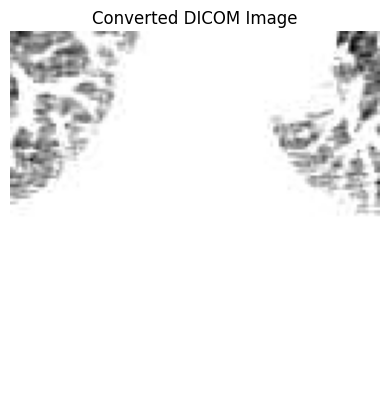

In [13]:
dcm = pydicom.dcmread('/content/output.dcm', force=True)
# Set the Transfer Syntax UID explicitly after reading
dcm.file_meta.TransferSyntaxUID = '1.2.840.10008.1.2.1' # Explicit VR Little Endian

plt.imshow(dcm.pixel_array, cmap='gray')
plt.title("Converted DICOM Image")
plt.axis('off')
plt.show()

**Data Anonymization**
DICOM anonymization is the process of removing or de-identifying sensitive patient information from DICOM (Digital Imaging and Communications in Medicine) files to protect patient privacy while retaining the clinical relevance of the data. However, it’s crucial to remember that anonymization should only be performed by authorized personnel and in accordance with established protocols and regulations. Misusing this process can violate patient privacy and ethical guidelines.

In [15]:
import pydicom

# Load a DICOM file
# Assuming 'dcm' from previous cells is available, or load a new one:
# dcm = pydicom.dcmread('your_dicom_file.dcm')

# Anonymize sensitive tags
# Removing Patient's Name, Patient ID, and Birth Date
if 'PatientName' in dcm:
    dcm.PatientName = "ANONYMIZED"
if 'PatientID' in dcm:
    dcm.PatientID = "ANONYMIZED"
if 'PatientBirthDate' in dcm:
    dcm.PatientBirthDate = "" # Removing the date

# You can also remove or anonymize other tags as needed
# For example, removing Referring Physician's Name
if 'ReferringPhysicianName' in dcm:
    del dcm.ReferringPhysicianName

# Explicitly set the Transfer Syntax UID before saving to match the desired encoding
# Implicit VR Little Endian
dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian

# Save the anonymized DICOM file with explicit arguments
dcm.save_as('anonymized_output.dcm', implicit_vr=True, little_endian=True)

print("Anonymization complete. Anonymized file saved as 'anonymized_output.dcm'")

Anonymization complete. Anonymized file saved as 'anonymized_output.dcm'
